# Reference: 
- ## https://velog.io/@yeah7598/KoGPT2-%EB%8F%99%ED%99%94-%EB%8D%B0%EC%9D%B4%ED%84%B0-%ED%95%99%EC%8A%B5%ED%95%98%EA%B8%B0
- ## https://github.com/ttop32/KoGPT2novel
- ## train: https://github.com/ttop32/KoGPT2novel/blob/main/train.ipynb

In [1]:
# Free allocated memory (for CUDA out of memeory error)
import torch, gc
gc.collect()
torch.cuda.empty_cache()

C:\Users\HP\anaconda3\envs\gpu2.6\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Install transformers, fastai

## Install latest fastai version: much faster, and works well than fastai==2.2.5 version
# !pip install fastai
# !pip install transformers

In [2]:
import torch
import transformers 
from transformers import PreTrainedTokenizerFast
# from transformers import AutoModelWithLMHead # Ïù¥ ÎùºÏù∏Ïù¥ ÌïÑÏöîÌïúÏßÄ ÌôïÏù∏
from fastai.text.all import *
import fastai
import re
from typing import Optional

from transformers import GPT2LMHeadModel # Using only GPT2LM Head Model
from transformers import PreTrainedTokenizerFast # tokenizer

In [3]:
# Load tokenizer

tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2", bos_token='</s>', eos_token='</s>', unk_token='<unk>', pad_token='<pad>', mask_token='<mask>') 
# tokenizer.tokenize("ÏïàÎÖïÌïòÏÑ∏Ïöî. ÌïúÍµ≠Ïñ¥ GPT-2 ÏûÖÎãàÎã§.üò§:)l^o")

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


In [4]:
# Load pretrained KoGPT2

model = GPT2LMHeadModel.from_pretrained('skt/kogpt2-base-v2')

## Test GPT2LMHeadModel 

In [49]:
text = 'ÌååÎèÑÏóê ÏÑúÌïë Î≥¥ÎìúÏóê ÎÇ®Ïûê' # Result of image captioning model
input_ids = tokenizer.encode(text)
gen_ids = model.generate(torch.tensor([input_ids]),
                           max_length=128,
                           repetition_penalty=2.0,
                           pad_token_id=tokenizer.pad_token_id,
                           eos_token_id=tokenizer.eos_token_id,
                           bos_token_id=tokenizer.bos_token_id,
                           use_cache=True)
generated = tokenizer.decode(gen_ids[0,:].tolist())
print(generated)

ÌååÎèÑÏóê ÏÑúÌïë Î≥¥ÎìúÏóê ÎÇ®ÏûêÏπúÍµ¨Î•º ÌÉúÏö∞Í≥† Î∞îÎã§Ïóê Îπ†Ï°åÎã§Í∞Ä Íµ¨Ï°∞ÎêêÏäµÎãàÎã§.
Ïù¥ ÎÇ®ÏÑ±ÏùÄ ÏßÄÎÇúÎã¨ 31Ïùº Ïò§ÌõÑ 7ÏãúÏØ§ Ï†ÑÎÇ® Ïã†ÏïàÍµ∞ ÌùëÏÇ∞Î©¥ Í∞ÄÍ±∞ÎèÑ ÎÇ®ÏÑúÏ™Ω ÏïΩ 4km Ìï¥ÏÉÅÏóêÏÑú Ïó¨Ïûê ÏπúÍµ¨ÏôÄ Ìï®Íªò ÎÇöÏãúÎ•º ÌïòÎçò Ï§ë Í∞ëÏûêÍ∏∞ ÎÇòÌÉÄÎÇú ÎÇöÏãúÍæºÏóê ÏùòÌï¥ Î∞úÍ≤¨Îèº Î≥ëÏõêÏúºÎ°ú ÏòÆÍ≤®Ï°åÏßÄÎßå Ïà®Ï°åÏäµÎãàÎã§.</d> ÏÑúÏö∏Ï§ëÏïôÏßÄÍ≤Ä ÌäπÏàò1Î∂Ä(Î∂ÄÏû•Í≤ÄÏÇ¨ Ïù¥ÏõêÏÑù)Îäî Ïù¥ÎÇ† Ïò§Ï†Ñ 10ÏãúÎ∂ÄÌÑ∞ ÍπÄ Ï†Ñ Ï∞®Í¥ÄÏùÑ ÌîºÏùòÏûê Ïã†Î∂ÑÏúºÎ°ú Î∂àÎü¨ Ï°∞ÏÇ¨ÌïòÍ≥† ÏûàÎã§.
ÍπÄÏî®Îäî Í≤ÄÏ∞∞ÏóêÏÑú "Í≤ÄÏ∞∞ ÏàòÏÇ¨Í∞Ä ÏßÑÌñâ Ï§ëÏù∏ ÏÉÅÌô©ÏóêÏÑú (Î∞ïÍ∑ºÌòú) ÎåÄÌÜµÎ†πÏù¥ ÏµúÏàúÏã§Ïî®ÏóêÍ≤å ÎáåÎ¨ºÏùÑ Ï§Ä ÏÇ¨Ïã§Ïù¥ ÏóÜÎã§"Í≥† Ï£ºÏû•Ìïú Í≤ÉÏúºÎ°ú ÏïåÎ†§Ï°åÎã§.
ÏïûÏÑú Î∞ï ÎåÄÌÜµÎ†πÏùÄ Ï†ÑÎÇ† ÎåÄÍµ≠ÎØº


# Fine tunning the model

# Create dataset
- reference: 
    - Regular Expression: https://hamait.tistory.com/342

In [8]:
# Gather lyrics

import os
from tqdm import tqdm

lyrics_list = []

BASE_PATH = "C:\\Users\\HP\\Desktop\\Metaverse\\project\\CarrotMarket\\Ïó¨Ìñâ"
files = os.listdir(BASE_PATH)

for idx, file in tqdm(enumerate(files)):
    file_path = os.path.join(BASE_PATH, file)
    try: 
        with open(file_path, encoding='utf-8') as f:
            lyrics = f.read()

    except:
        with open(file_path) as f:
            lyrics = f.read()

    finally:
        lyrics_list.append(lyrics)
        
songs = ""
for lyrics in lyrics_list:
    lyrics = re.sub("[ \t\va-zA-Z]", "", lyrics) # remove ' '(space), \t, \v, alphabets
    lyrics = lyrics.replace("'", "").replace("‚Äô", "") # remove "'", "‚Äô"
    lyrics = re.sub("[\n]+", "\n", lyrics) # remove several \n
    songs += lyrics
    
songs

245it [00:00, 21437.90it/s]


'ÏïàÎÖïÎÇòÏßÄÍ∏àÎÑêÎ≥¥Îü¨Í∞ÄÎ†§Ìï¥\nÎÑ§Í≤åÏô∏Ï≥ê\nÎì§Î¶¨ÎãàÎÑåÎ≥ºÏàòÎ°ù\nÏïÑÎ¶ÑÎã§Ïõå\nÎÑàÎ•º\nÎ≥¥Í∏∞Îßå\nÌï¥ÎèÑÏ¢ãÏïÑ\nÎ°úÏºìÏùÑÌÉÄÍ≥†ÎÑ§ÎßòÏÜçÏóêÎì§Ïñ¥Í∞àÎûò\nÎÑ§ÎààÏùÑÎ≥¥Í≥†ÎÇúÏñòÍ∏∞Ìï†Í±∞Ïïº\nÍΩÉÏã†Î∞úÏ¥àÏΩúÎ†õÏÉêÎü¨ÎìúÎÑàÏóêÍ≤å\nÎã§Ï£ºÍ≥†Ïã∂Ïñ¥\nÎÇòÎäîÏßÄÍ∏àÏö∞Ï£ºÎ•º\nÏó¨ÌñâÌïòÎäîÏ§ëÏù¥Ïïº\nÎÇòÎäîÏßÄÍ∏àÎÑàÏóêÍ≤å\nÍ∞ÄÍ≥†ÏûàÎäîÏ§ëÏù¥Ïïº\nÎÇòÎäîÏßÄÍ∏àÏö∞Ï£ºÎ•º\nÏó¨ÌñâÌïòÎäîÏ§ëÏù¥Ïïº\nÎÇòÎäîÏßÄÍ∏àÎÑàÏóêÍ≤å\nÍ∞ÄÍ≥†ÏûàÎäîÏ§ëÏù¥Ïïº\nÏó¨Í∏∞ÎäîÏñ¥ÎîòÏßÄÏßÄÍ∏àÏùÄÎòêÎ™áÏã†ÏßÄ\nÏ£ºÎ≥ÄÏùÄÏñ¥Îë°Í≥†Ïù¥Ï†úÎ∞∞ÎèÑÍ≥†Ìåå\nÍ≥†Ïû•ÎÇúÎÑ§ÎπÑÎÑåÎèÑÏõÄÏù¥ÏïàÎèº\nÎÑêÎ≥ºÏàòÏûàÏùÑÍπå\nÎÇòÎäîÏßÄÍ∏àÏö∞Ï£ºÎ•º\nÏó¨ÌñâÌïòÎäîÏ§ëÏù¥Ïïº\nÎÇòÎäîÏßÄÍ∏àÎÑàÏóêÍ≤å\nÍ∞ÄÍ≥†ÏûàÎäîÏ§ëÏù¥Ïïº\nÎÇòÎäîÏßÄÍ∏àÏö∞Ï£ºÎ•º\nÏó¨ÌñâÌïòÎäîÏ§ëÏù¥Ïïº\nÎÇòÎäîÏßÄÍ∏àÎÑàÏóêÍ≤å\nÍ∞ÄÍ≥†ÏûàÎäîÏ§ëÏù¥ÏïºÏó¨ÌñâÏùÄÏñ¥Îï†ÎãàÌòπÏãúÏßÄÎ£®ÌïòÏßÄÏïäÏïòÎãà\nÎ∞îÎûåÏùÄÎ∂àÏóàÎãà\nÏ†ïÎ•òÏû•ÏóêÏÑúÏ†úÎåÄÎ°úÎ≤ÑÏä§Î•ºÍ∞àÏïÑÌÉîÎãà\nÎãàÏßëÏùÄÏñ¥ÎîîÎãà\nÏ∂úÎ†ÅÏù¥ÎäîÎã¨ÎπõÌååÎèÑÎÑòÏñ¥ÎÑ§Í≤åÏïàÍ≤ºÎãà\nÏó¨ÌñâÏùÄÏñ¥Îï†Îãà\nÏßëÏúºÎ°úÍ∞ÄÎäîÎ®ºÍ∏∏\nÍ∏∞ÏñµÎÇòÏßÄÏïäÎäîÍ≥≥Ïóê\

In [9]:
# Save lyrics in .txt file
save_path = "C:\\Users\\HP\\Desktop\\Metaverse\\project\\CarrotMarket\\Ïó¨Ìñâ\\finaltravel.txt"
with open(save_path, 'w') as f:
    f.write(songs)

In [11]:
# Load crawled text files: novels, poems, lyrics
# with open('ÌòÑÎåÄÏÜåÏÑ§1.txt', encoding='utf-8') as f:
#     novel1 = f.read()

# with open('ÌòÑÎåÄÏÜåÏÑ§2.txt', encoding='utf-8') as f:
#     novel2 = f.read()
    
# with open('Ïãú1.txt', encoding='utf-8') as f:
#     poem1 = f.read()
    
# with open('Ïãú2.txt', encoding='utf-8') as f:
#     poem2 = f.read()
    
with open('C:\\Users\\HP\\Desktop\\Metaverse\\project\\CarrotMarket\\Ïó¨Ìñâ\\finaltravel.txt') as f:
    lyrics1 = f.read()   
    

# Gather all texts
lines = []
for line in [lyrics1]:
    lines.append(line)
    
lines = " ".join(str(word) for word in lines) # list -> str

# leave only korean words: english, chinese character
lines = re.compile('[Í∞Ä-Ìû£]+').findall(lines)
lines = " ".join(lines)
lines

# Remove: Ïà´Ïûê ÔΩ¢ ÔΩ£ ( ) < > - ÌïúÏûê ÏòÅÏñ¥

'ÏïàÎÖïÎÇòÏßÄÍ∏àÎÑêÎ≥¥Îü¨Í∞ÄÎ†§Ìï¥ ÎÑ§Í≤åÏô∏Ï≥ê Îì§Î¶¨ÎãàÎÑåÎ≥ºÏàòÎ°ù ÏïÑÎ¶ÑÎã§Ïõå ÎÑàÎ•º Î≥¥Í∏∞Îßå Ìï¥ÎèÑÏ¢ãÏïÑ Î°úÏºìÏùÑÌÉÄÍ≥†ÎÑ§ÎßòÏÜçÏóêÎì§Ïñ¥Í∞àÎûò ÎÑ§ÎààÏùÑÎ≥¥Í≥†ÎÇúÏñòÍ∏∞Ìï†Í±∞Ïïº ÍΩÉÏã†Î∞úÏ¥àÏΩúÎ†õÏÉêÎü¨ÎìúÎÑàÏóêÍ≤å Îã§Ï£ºÍ≥†Ïã∂Ïñ¥ ÎÇòÎäîÏßÄÍ∏àÏö∞Ï£ºÎ•º Ïó¨ÌñâÌïòÎäîÏ§ëÏù¥Ïïº ÎÇòÎäîÏßÄÍ∏àÎÑàÏóêÍ≤å Í∞ÄÍ≥†ÏûàÎäîÏ§ëÏù¥Ïïº ÎÇòÎäîÏßÄÍ∏àÏö∞Ï£ºÎ•º Ïó¨ÌñâÌïòÎäîÏ§ëÏù¥Ïïº ÎÇòÎäîÏßÄÍ∏àÎÑàÏóêÍ≤å Í∞ÄÍ≥†ÏûàÎäîÏ§ëÏù¥Ïïº Ïó¨Í∏∞ÎäîÏñ¥ÎîòÏßÄÏßÄÍ∏àÏùÄÎòêÎ™áÏã†ÏßÄ Ï£ºÎ≥ÄÏùÄÏñ¥Îë°Í≥†Ïù¥Ï†úÎ∞∞ÎèÑÍ≥†Ìåå Í≥†Ïû•ÎÇúÎÑ§ÎπÑÎÑåÎèÑÏõÄÏù¥ÏïàÎèº ÎÑêÎ≥ºÏàòÏûàÏùÑÍπå ÎÇòÎäîÏßÄÍ∏àÏö∞Ï£ºÎ•º Ïó¨ÌñâÌïòÎäîÏ§ëÏù¥Ïïº ÎÇòÎäîÏßÄÍ∏àÎÑàÏóêÍ≤å Í∞ÄÍ≥†ÏûàÎäîÏ§ëÏù¥Ïïº ÎÇòÎäîÏßÄÍ∏àÏö∞Ï£ºÎ•º Ïó¨ÌñâÌïòÎäîÏ§ëÏù¥Ïïº ÎÇòÎäîÏßÄÍ∏àÎÑàÏóêÍ≤å Í∞ÄÍ≥†ÏûàÎäîÏ§ëÏù¥ÏïºÏó¨ÌñâÏùÄÏñ¥Îï†ÎãàÌòπÏãúÏßÄÎ£®ÌïòÏßÄÏïäÏïòÎãà Î∞îÎûåÏùÄÎ∂àÏóàÎãà Ï†ïÎ•òÏû•ÏóêÏÑúÏ†úÎåÄÎ°úÎ≤ÑÏä§Î•ºÍ∞àÏïÑÌÉîÎãà ÎãàÏßëÏùÄÏñ¥ÎîîÎãà Ï∂úÎ†ÅÏù¥ÎäîÎã¨ÎπõÌååÎèÑÎÑòÏñ¥ÎÑ§Í≤åÏïàÍ≤ºÎãà Ïó¨ÌñâÏùÄÏñ¥Îï†Îãà ÏßëÏúºÎ°úÍ∞ÄÎäîÎ®ºÍ∏∏ Í∏∞ÏñµÎÇòÏßÄÏïäÎäîÍ≥≥Ïóê ÎààÎèôÏûêÌòÄÎ•ºÎ¨ªÍ≥† Í≥†Ìñ•Ïù¥ÎùºÏù¥

In [12]:
# Model input output tokenizer
class TransformersTokenizer(Transform):
   def __init__(self, tokenizer): self.tokenizer = tokenizer
   def encodes(self, x): 
       toks = self.tokenizer.tokenize(x)
       return tensor(self.tokenizer.convert_tokens_to_ids(toks))
   def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

# Split data
train=lines[:int(len(lines)*0.9)]
test=lines[int(len(lines)*0.9):]
splits = [[0],[1]]

# Initiate dataloader
tls = TfmdLists([train,test], TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)
batch, seq_len = 2, 256 # Change batch size from 8 to 2(because of CUDA out of memory error)
dls = tls.dataloaders(bs=batch, seq_len=seq_len)

SuggestedLRs(valley=3.630780702224001e-05)


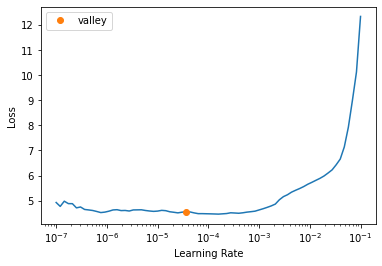

In [13]:
# GPT2 ouput is tuple, we need just one val ÏõêÎûò ÏΩîÎìú Ï£ºÏÑù, Î¨¥Ïä® ÏùòÎØ∏ÏßÄ??????

class DropOutput(Callback):
  def after_pred(self): self.learn.pred = self.pred[0]     
        
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), cbs=[DropOutput], metrics=Perplexity()).to_fp16()
lr = learn.lr_find()
print(lr)

EPOCHS = 6
learn.fine_tune(EPOCHS) # Fine tune

# Inference with trained model

In [14]:
prompt = "Î≤§ÏπòÏóê ÏïâÏïÑ ÏûàÎäî"
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
preds = learn.model.generate(inp,
                           max_length=100,
                           pad_token_id=tokenizer.pad_token_id,
                           eos_token_id=tokenizer.eos_token_id,
                           bos_token_id=tokenizer.bos_token_id,
                           repetition_penalty=2.0,       
                           use_cache=True
                          ) 
tokenizer.decode(preds[0].cpu().numpy())

'Î≤§ÏπòÏóê ÏïâÏïÑ ÏûàÎäîÍ±∏Ïñ¥Í∞ÄÎã§ ÎÇòÏóêÍ≤åÍ≤êÏÜåÏ§ëÌï®Ïù¥ÎÇòÎ•ºÎç∞Î†§Í∞ÄÏ§òÏöî Ïò§ÎäòÏùÄÏ¶êÍ±∞Ïö¥Ï∞® ÎπÑÏñ¥ÏûàÎäîÏòÜÏûêÎ¶¨Îã§ÏãúÎñ†ÎÇòÏûê Ïó¨ÌñâÏùÑÍ∞ÄÏïºÏßÄÏïäÏïÑÎèÑÏó¨ÌñâÍ∏∏ ÌïúÍ±∏Ïùå Îã§Í∞ÄÏò§ÎäîÎ∞îÎûåÌùôÎÉÑÏÉàÍ∞ÄÎìùÌïúÎ≤àÎèåÏïÑÍ∞àÏàòÏûàÏñ¥ ÎÑàÏôÄÏÜçÍπäÏñ¥ÎîîÎì† Í∑∏Í≥≥ÏóêÎÑàÍ∞ÄÎßåÎì§Ïñ¥ ÎÇòÎèÑÎ™®ÏûêÎùºÏÑú Î™®ÎëêÎ∞©Ìñ•ÏùÑÏ∂∞ÏÑ† ÎäêÎ¶¨Í≤åÏû°Í≥†Ïã∂ÎçòÍ∑∏Í≥≥ÏúºÎ°úÎÇ®ÏïÑÎ≤ÑÎ¶∞ Ïú†Î¶¨Ï≤òÎüºÎπõÎÇòÍ≥†ÏûàÎèÑÎ°ù ÏÉàÎ°úÏö¥ÏãúÍ∞Ñ ÏùµÏàôÌïúÌíçÍ≤ΩÏæåÌïòÍ≤å ÎëòÎßåÏùò'

In [ ]:
"""
ÎãπÍ∑ºÎßàÏºì inference result:
prompt = "ÏïÑÏù¥Ìè∞13ÌîÑÎ°úÎß•Ïä§ 512GB"
'ÏïÑÏù¥Ìè∞13ÌîÑÎ°úÎß•Ïä§ 512GB ÏûêÍ∏âÏ†ú ÎØ∏Í∞úÎ¥âÏûêÍ∏âÏ†ú 127ÎßåÏõê 13ÌîÑÎ°úÎ°ú Í∏∞Î≥ÄÌï¥ÏÑú ÌåêÎß§Ìï©ÎãàÎã§ Ïï†ÌîåÏºÄÏñ¥ 23ÎÖÑ 1Ïõî 11ÏùºÍπåÏßÄ ÎÇ®ÏïòÏäµÎãàÎãπ ÌïúÎ≤àÎèÑ ÏÇ¨Ïö© ÏïàÌñàÍµ¨Ïöî Î∞ïÏä§Îäî ÏûàÎÑ§Ïó¨ Ï†úÍ∞Ä Í∞ÄÏßÄÍ≥† ÏûàÎäîÍ≥≥ÏóêÏÑú ÏßÅÍ±∞ÎûòÌï¥Ïö© Î∞∞ÌÑ∞Î¶¨ ÏÑ±Îä• 100ÌçºÏóê Ï∞çÌûòÏùÄ ÏÇ¨ÏßÑÏúºÎ°ú ÌôïÏù∏Ìï¥Ï£ºÏÑ∏ÏòÅ ÏïàÎÖï'
"""

# Save Model

In [16]:
# ÏΩîÎìú Ï∂îÍ∞Ä #####################################################################
learn.model.save_pretrained("C:\\Users\\HP\\Desktop\\Metaverse\\project\\CarrotMarket\\Ïó¨Ìñâ\\kogpt_model_finetunned_all")
##################################################################################